# 10 Feature

f_classif ->    fbs, chol, restecg, trestbps, age, sex
chi2 ->         fbs, restecg, thal, sex, slope, trestbps
info_classif -> fbs, restecg, trestbps, sex, age,slope

'fbs','restecg','trestbps' removing this three feature 

# Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dataset problems

Thanks to the post of InitPic we noted that this dataset is a bit different from the original one while the description is the same.

Part of these differences is that there were a few null values in the original dataset that have taken some values here:

A few more things to consider:

In this Dataset data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)

also data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

Because these are just a few instances, I decided to drop them.

In [4]:
df[df.ca == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In this Dataset data #93, 159, 164, 165 and 252 have ca=4 which is incorrect.

In [5]:
df[df.thal == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


also data #49 and 282 have thal = 0, also incorrect.

In [6]:
df.duplicated(subset=None, keep="first").sum()

1

And also a duplicate row, It also should be removed. 

### Date Cleaning

In [7]:
#replace false value with most appropriate value
df['ca'] = df['ca'].replace([4],3)

In [8]:
df[df.ca == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [9]:
#replace false value with most appropriate value
df['thal'] = df['thal'].replace([0],7) 

In [10]:
df[df.thal == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [11]:
df.shape

(303, 14)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.712871,2.359736,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.976580,0.694798,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,7.000000,1.000000


# Scalling The Data
Normalize the data into 0 and 1


### Standard Scalar

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'] 
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.731175,-1.960261,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.731175,-0.518613,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.731175,-0.518613,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.731175,-0.518613,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.731175,-0.518613,1


In [15]:
X= df.drop(['target','trestbps','fbs','restecg'], axis=1) #,'trestbps','chol','fbs','restecg'
y= df['target']

In [16]:
#devide Dataset into test and train
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [17]:
#check those dataset
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2120
X_test- 910
y_train- 212
y_test- 91


# Logistic regration

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1234, C =  1, tol = 5)
model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

y_pred_quant1 = model1.predict_proba(X_test)[:, 1]

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 2, 49]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

accuracies = {}

acc = accuracy_score(y_test,prediction1)*100
accuracies['Logistic Regration'] = acc
acc

93.4065934065934

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.92      0.96      0.94        51

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



# Dicision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=999)
model2 = dtc.fit(X_train,y_train)
prediction2 = model2.predict(X_test)

y_pred_quant2 = model2.predict_proba(X_test)[:, 1]

# probs = model.predict_proba(X_test)
# probs = probs[:, 1]
# loss = log_loss(testy, probs)
# loss

In [23]:
cm2 = confusion_matrix(y_test,prediction2)
cm2

array([[34,  6],
       [15, 36]], dtype=int64)

In [24]:
acc = accuracy_score(y_test,prediction2)*100
accuracies['Dicision Tree'] = acc
acc

76.92307692307693

In [25]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        40
           1       0.86      0.71      0.77        51

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91



# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=50)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)

y_pred_quant3 = model3.predict_proba(X_test)[:, 1]

cm3 = confusion_matrix(y_test, prediction3)
cm3

array([[35,  5],
       [ 7, 44]], dtype=int64)

In [27]:
acc = accuracy_score(y_test, prediction3)*100
accuracies['Random Forest'] = acc
acc

86.81318681318682

In [28]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.90      0.86      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



# Support Vector machine

In [29]:
from sklearn.svm import SVC

svm=SVC(probability=True, C = 1)
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)

y_pred_quant4 = model4.predict_proba(X_test)[:, 1]

cm4= confusion_matrix(y_test,prediction4)
cm4

array([[33,  7],
       [ 3, 48]], dtype=int64)

In [30]:
acc = accuracy_score(y_test, prediction4)*100
accuracies['Support Vector Machine'] = acc
acc

89.01098901098901

In [31]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.87      0.94      0.91        51

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91



# Gaussion NB

In [32]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)

y_pred_quant5 = model5.predict_proba(X_test)[:, 1]

cm5= confusion_matrix(y_test, prediction5)
cm5

array([[36,  4],
       [ 5, 46]], dtype=int64)

In [33]:
acc = accuracy_score(y_test, prediction5)*100
accuracies['Gaussion NB'] = acc
acc

90.10989010989012

In [34]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.92      0.90      0.91        51

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91



# K nearest neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 11)
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)

y_pred_quant6 = model6.predict_proba(X_test)[:, 1]

cm6= confusion_matrix(y_test, prediction6)
cm6

array([[35,  5],
       [ 2, 49]], dtype=int64)

In [36]:
acc = accuracy_score(y_test, prediction6)*100
accuracies['K nearest neighbor'] = acc
acc

92.3076923076923

In [37]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.91      0.96      0.93        51

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



# Comparing Model

In [38]:
print('Logistic Regration - lr :', accuracy_score(y_test, prediction1) * 100)
print('Dicission Tree - dtc :', accuracy_score(y_test, prediction2) * 100)
print('Random Forrest - rfc :', accuracy_score(y_test, prediction3) * 100)
print('Support vector Machine - svm: ', accuracy_score(y_test, prediction4) * 100)
print('Gaussion NB - NB :', accuracy_score(y_test, prediction5) * 100)
print('K Nearest - KNN :', accuracy_score(y_test, prediction6) * 100)

Logistic Regration - lr : 93.4065934065934
Dicission Tree - dtc : 76.92307692307693
Random Forrest - rfc : 86.81318681318682
Support vector Machine - svm:  89.01098901098901
Gaussion NB - NB : 90.10989010989012
K Nearest - KNN : 92.3076923076923


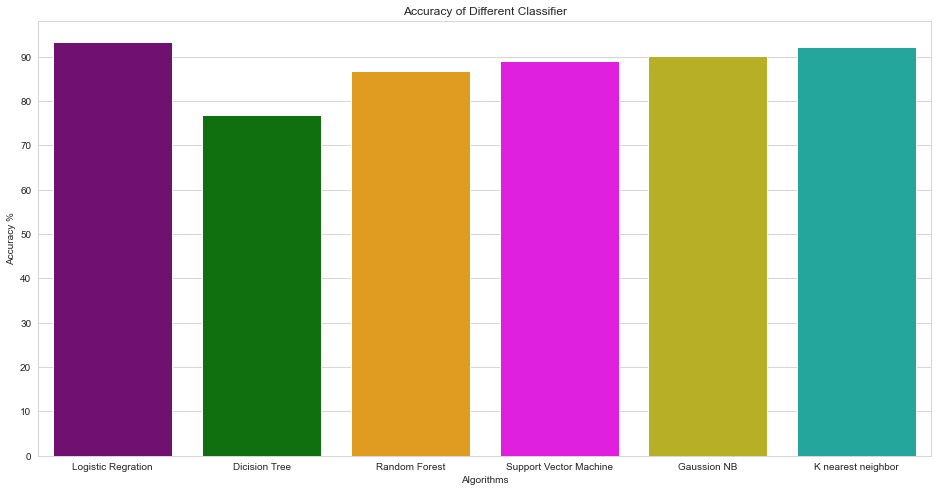

In [39]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title("Accuracy of Different Classifier")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

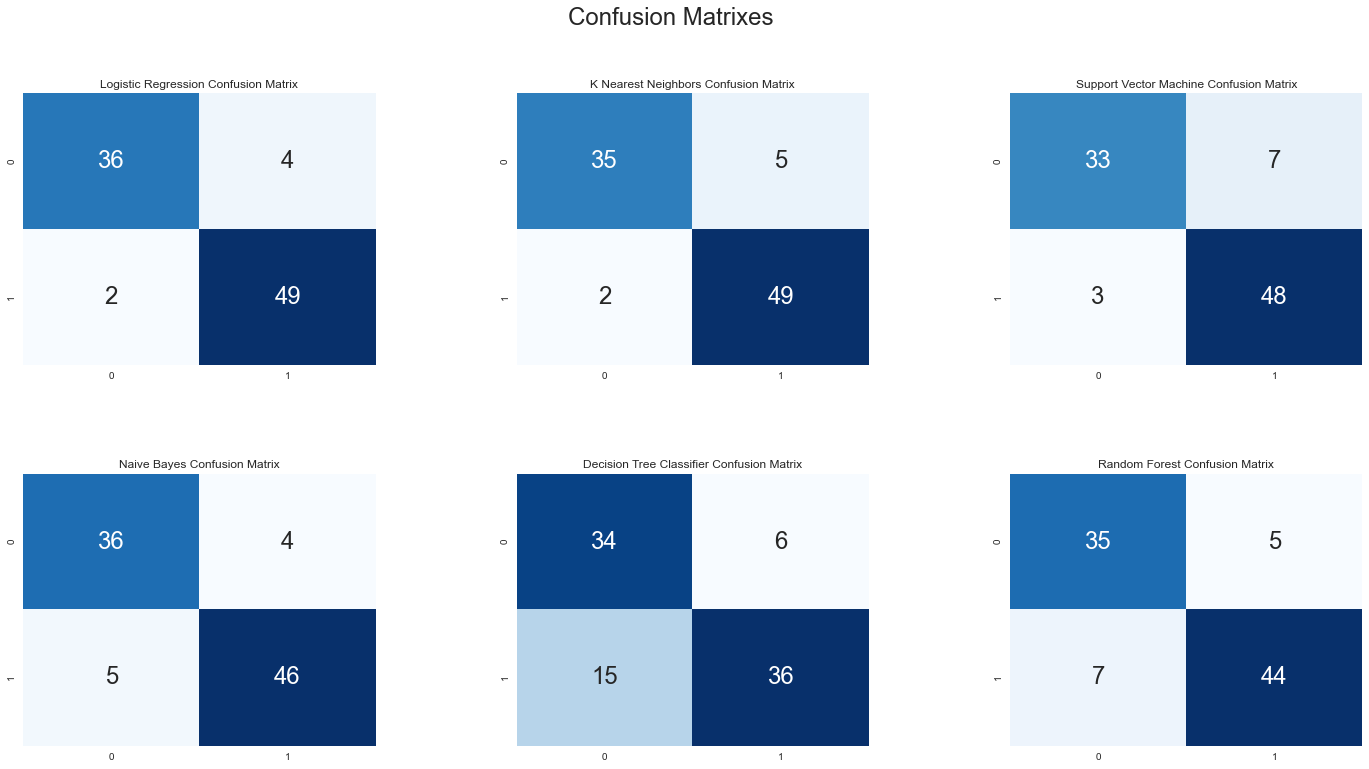

In [40]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.show()

Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as

Sensitivity = TruePositives / True Positives + False Negatives 

Specificity = TrueNegatives / True Negatives + False Positives

# Sensitivity

In [41]:
sensitivitys = {}

sensitivity = (cm[0,0]/(cm[0,0]+cm[1,0]))*100
print('Sensitivity of Logistic Regression : ', sensitivity )
sensitivitys['Logistic Regration'] = sensitivity

sensitivity = (cm2[0,0]/(cm2[0,0]+cm2[1,0]))*100
print('Sensitivity of Decision Tree Classifier : ', sensitivity )
sensitivitys['Decision Tree Classifier'] = sensitivity

sensitivity = (cm3[0,0]/(cm3[0,0]+cm3[1,0]))*100
print('Sensitivity of Random Forest : ', sensitivity )
sensitivitys['Random Forest'] = sensitivity

sensitivity = (cm4[0,0]/(cm4[0,0]+cm4[1,0]))*100
print('Sensitivity of Support Vector Machine: ', sensitivity )
sensitivitys['Support Vector Machine'] = sensitivity

sensitivity = (cm5[0,0]/(cm5[0,0]+cm5[1,0]))*100
print('Sensitivity of Naive Bayes : ', sensitivity )
sensitivitys['Naive Bayes'] = sensitivity

sensitivity = (cm6[0,0]/(cm6[0,0]+cm6[1,0]))*100
print('Sensitivity of K Nearest Neighbors : ', sensitivity )
sensitivitys['K Nearest Neighbors'] = sensitivity

Sensitivity of Logistic Regression :  94.73684210526315
Sensitivity of Decision Tree Classifier :  69.38775510204081
Sensitivity of Random Forest :  83.33333333333334
Sensitivity of Support Vector Machine:  91.66666666666666
Sensitivity of Naive Bayes :  87.8048780487805
Sensitivity of K Nearest Neighbors :  94.5945945945946


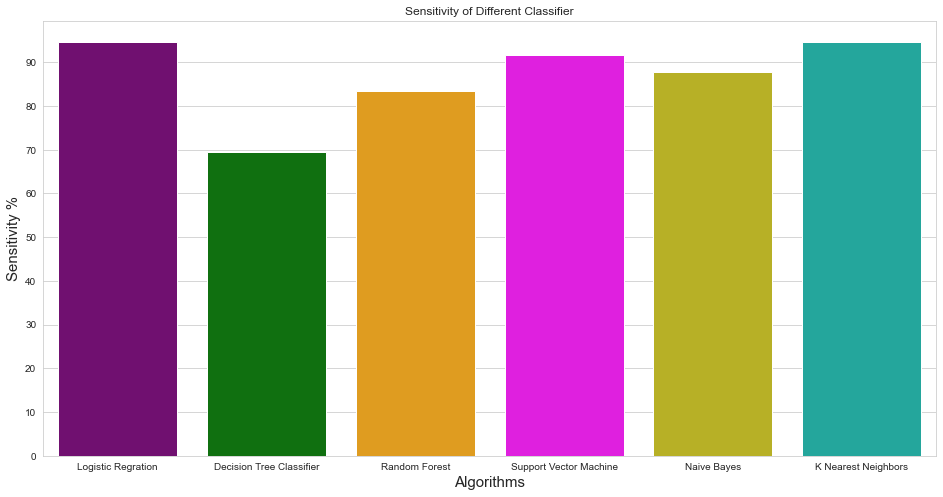

In [42]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Sensitivity %", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("Sensitivity of Different Classifier")
sns.barplot(x=list(sensitivitys.keys()), y=list(sensitivitys.values()), palette=colors)

plt.show()

# Specificity

In [43]:
specificitys = {}

specificity = (cm[1,1]/(cm[1,1]+cm[0,1]))*100
print('Specificity of Logistic Regression : ', specificity)
specificitys['Logistic Regression'] = specificity

specificity = (cm2[1,1]/(cm2[1,1]+cm2[0,1]))*100
print('specificity of Decision Tree Classifier : ', specificity )
specificitys['Decision Tree'] = specificity

specificity = (cm3[1,1]/(cm3[1,1]+cm3[0,1]))*100
print('specificity of Random Forest : ', specificity )
specificitys['Random Forest'] = specificity

specificity = (cm4[1,1]/(cm4[1,1]+cm4[0,1]))*100
print('specificity of Support Vector Machine: ', specificity )
specificitys['Support Vector Machine'] = specificity

specificity = (cm5[1,1]/(cm5[1,1]+cm5[0,1]))*100
print('specificity of Naive Bayes : ', specificity )
specificitys['Naive Bayes'] = specificity

specificity = (cm6[1,1]/(cm6[1,1]+cm6[0,1]))*100
print('specificity of K Nearest Neighbors : ', specificity )
specificitys['K Nearest Neighbors'] = specificity

Specificity of Logistic Regression :  92.45283018867924
specificity of Decision Tree Classifier :  85.71428571428571
specificity of Random Forest :  89.79591836734694
specificity of Support Vector Machine:  87.27272727272727
specificity of Naive Bayes :  92.0
specificity of K Nearest Neighbors :  90.74074074074075


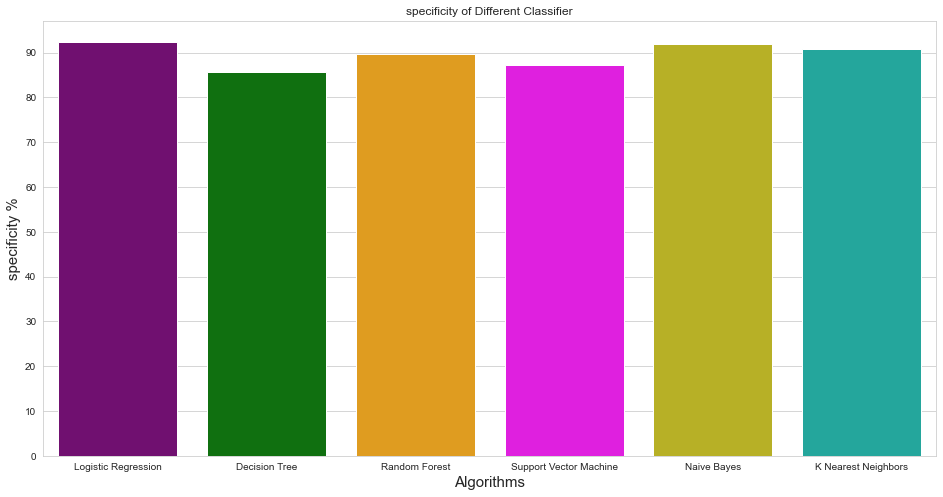

In [44]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("specificity %", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("specificity of Different Classifier")
sns.barplot(x=list(specificitys.keys()), y=list(specificitys.values()), palette=colors)
plt.show()

# ROC curve

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail

AUC of LogisticRegression()  is :  96.02941176470587
AUC of DecisionTreeClassifier()  is :  76.27450980392157
AUC of RandomForestClassifier()  is :  93.43137254901961
AUC of SVC(probability=True)  is :  94.41176470588235
AUC of GaussianNB()  is :  95.5392156862745
AUC of KNeighborsClassifier()  is :  91.81372549019609


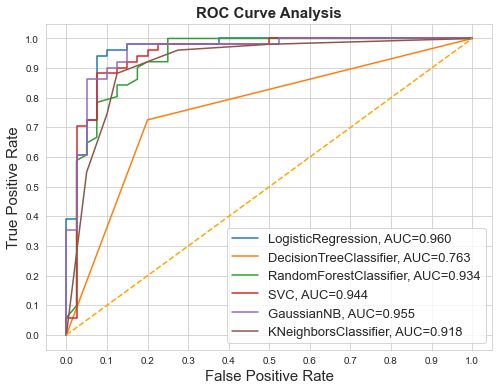

In [46]:
ROC_Curve = {}

# Instantiate the classifiers and make a list
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(probability=True),
               GaussianNB(),
               KNeighborsClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    print("AUC of", cls ," is : ", auc * 100)
    ROC_Curve[cls] = auc * 100
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)
    

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

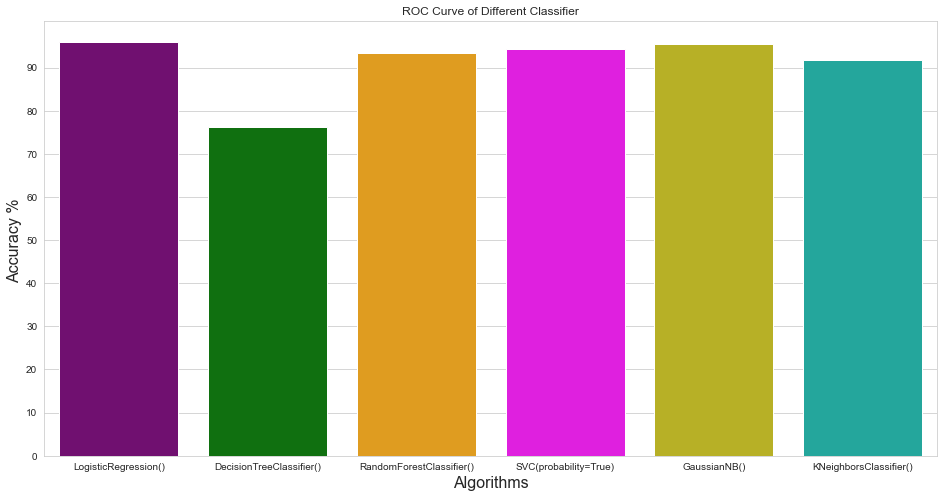

In [47]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy % ", fontsize = 16)
plt.xlabel("Algorithms", fontsize = 16)
plt.title("ROC Curve of Different Classifier")
sns.barplot(x=list(ROC_Curve.keys()), y=list(ROC_Curve.values()), palette=colors)

plt.show()

# Log loss

Log loss, also called “logistic loss,” “logarithmic loss,” or “cross entropy” can be used as a measure for evaluating predicted probabilities.

Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value. The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and enormous score for a large difference (0.9 or 1.0).

A model with perfect skill has a log loss score of 0.0.

In order to summarize the skill of a model using log loss, the log loss is calculated for each predicted probability, and the average loss is reported.

In [48]:
from sklearn.metrics import log_loss

logLoss = {}

loss = log_loss(y_test, y_pred_quant1)
print('Loss of Logistic Regression : ', loss)
logLoss['Logistic Regression'] = loss

loss = log_loss(y_test, y_pred_quant2)
print('Loss of Decision Tree Classifier : ', loss )
logLoss['Decision Tree'] = loss

loss = log_loss(y_test, y_pred_quant3)
print('Loss of Random Forest : ', loss )
logLoss['Random Forest'] = loss

loss = log_loss(y_test, y_pred_quant4)
print('Loss of Support Vector Machine: ', loss )
logLoss['Support Vector Machine'] = loss

loss = log_loss(y_test, y_pred_quant5)
print('Loss of Naive Bayes : ', loss )
logLoss['Naive Bayes'] = loss

loss = log_loss(y_test, y_pred_quant6)
print('Loss of K Nearest Neighbors : ', loss )
logLoss['K Nearest Neighbors'] = loss

Loss of Logistic Regression :  0.2750123073672602
Loss of Decision Tree Classifier :  7.970539581073688
Loss of Random Forest :  0.36066903403435496
Loss of Support Vector Machine:  0.31571285380550096
Loss of Naive Bayes :  0.2885704981019798
Loss of K Nearest Neighbors :  0.6461777806648863


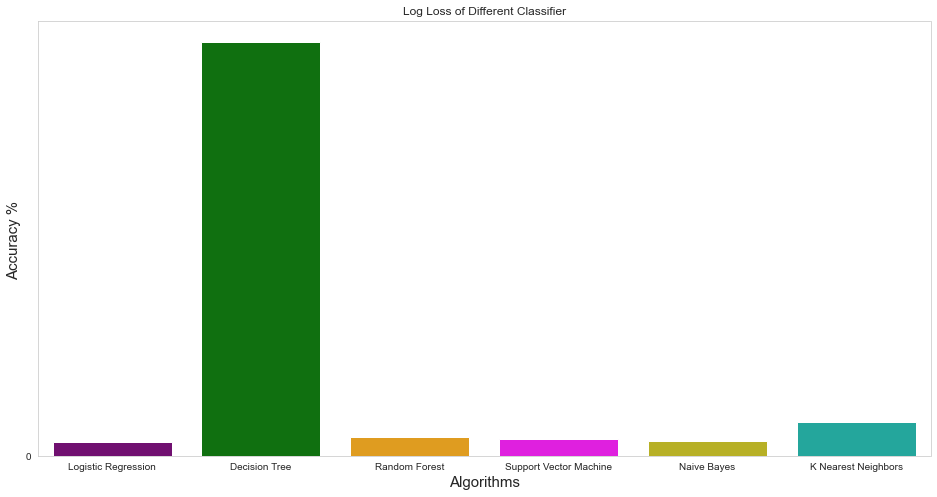

In [49]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy % ", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("Log Loss of Different Classifier")
sns.barplot(x=list(logLoss.keys()), y=list(logLoss.values()), palette=colors)
plt.show()